# APCW

We import the necessary modules:

In [1]:
import meep as mp
from meep import mpb
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

We import the necessary functions:

In [2]:
import sys
sys.path.append("/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/")

In [3]:
from ExternalFunctions import (geom_apcw,plot_bands_1D_THZ, calculate_efield, plot_epsilon_YZ,
                               plot_field_2D_YZ, simulation_domain)

##  Defining the sinusoidal dielectric blocks

We define some boolean values for executing purposes:

In [4]:
plot = False
simulate = False
save = False

First, we define some parameters that describe the geometry:

In [5]:
ax = 3.7                                    #  e-7 meters
ay = 15
az = 15

# The cell dimensions

sx = 3.7 / ax
sy = 15                                     # size of cell in y direction (perpendicular to wvg.)
sz = 15                                     # size of cell in z direction (perpendicular to wvg.)


cell = mp.Vector3(sx, sy, sz)
geometry_lattice = mp.Lattice(size=mp.Vector3(sx,sy, sz))


resolution = 4

We define the parameters for the APCW:

In [6]:
index = 1.9935                              # refractive index of Si3N4
period = 3.7 / ax
amp = 1.4 /ax
width = 2.88 /ax
thickness = 2 /ax
gap = 2.2 /ax
params = [ index, period, amp, width, thickness, gap ]

In [7]:
eps_func = geom_apcw(params)
default_material = eps_func

If this is set to **TRUE** we can plot a 3D image of the geometry:

In [8]:
if plot == True:
    from mayavi import mlab
    sim = mp.Simulation(resolution=resolution,
                    cell_size=mp.Vector3(sx,sy,sz),
                    material_function=default_material)

    sim.init_sim()

    eps_data = sim.get_epsilon()
    eps_data = np.concatenate([eps_data,eps_data,eps_data])
    s = mlab.contour3d(eps_data, colormap="YlGnBu")
    mlab.show()

If this is set to **TRUE**  we can simulate the geometry:

In [9]:
if simulate == True:
    
    num_bands = 10

    num_k = 1
    k_min = 0
    k_max = 0.5 

    k_points = mp.interpolate(num_k, [mp.Vector3(k_min), mp.Vector3(k_max)])
    
    ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    k_points=k_points,
                    default_material=default_material,
                    resolution=resolution,
                    num_bands=num_bands);
    ms.run();

In [10]:
if plot == True: 
    a = 3.7
    num_bands = 1
    k_point = mp.Vector3(0.5,0)
    sim_params = geometry_lattice,  k_point, default_material, resolution, num_bands
    num_period =  3
    
    ylim = [-10,10]                                                                 
    zlim = [-4,4]
    
    title = "Dielectric material distribution"
    
    fig, ax = plot_epsilon_YZ(sim_params,  a, num_period, ylim,  zlim, title)

## Band diagram calculation:

In [11]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/03_Periodic_Dielectric_Waveguides/APCW


In [12]:
f1 = np.genfromtxt(path+"/data/APCW_mpb_bands_TE.dat", delimiter=",")[:,1:]
f2 = np.genfromtxt(path+"/data/APCW_mpb_bands_TM.dat", delimiter=",")[:,1:]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


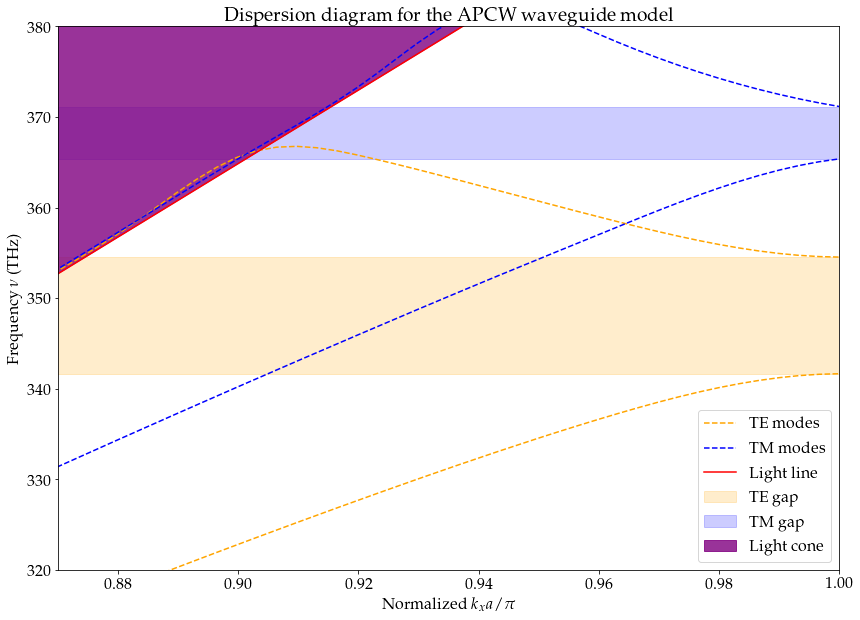

In [13]:
a = 3.7 * 1e-7
num_bands = 3
files = f1, f2
xlims = [0.87,1]
ylims = [320,380]
fig = plot_bands_1D_THZ(a, num_bands, files, xlims, ylims)

As we can see the TE band edges can be aligned with the D1 and D2 transitions of the Cs atom.

In [14]:
if save == True:
    fig.savefig("results/Dispersion_relation_APCW.pdf")

## Field calculation

We define our simulation parameteres:

In [15]:
resolution = 12
num_bands = 4
k_point = mp.Vector3(0.5,0)

sim_params = geometry_lattice,  k_point, default_material, resolution, num_bands

In [16]:
num_period = 5
component = "Z"
fields, epsilon = calculate_efield(sim_params, num_period, component)

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 12 x 180 x 180.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 15, 0)
     (0, 0, 15)
Cell volume = 225
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.0666667, -0)
     (0, -0, 0.0666667)
Geometric objects:
Geometric object tree has depth 1 and 0 object nodes (vs. 0 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 348.0956587791443
solve_kpoint (0.5,0,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 25 iterations.
freqs:, 1, 0.5, 0, 0, 0.5, 0.414449, 0.426368, 0.434112, 0.449323
elapsed time for k point: 36.286911487579346
Fixing e-field (band 1) phase by -0.967358 + -0.253412i; max ampl. = 0.844525
Fixing e-field 

100%|██████████| 4/4 [00:00<00:00, 52.83it/s]

total elapsed time for run: 384.986967086792
done


epsilon: 1-3.97404, mean 1.01095, harm. mean 1.00307, 0.442901% > 1, 0.368141% "fill"


In [17]:
a = ax
eps = epsilon

domain_limits = simulation_domain (a, eps, resolution)

The simulation domain lengths are: [277 277  18]


Text(0, 0.5, 'Z distance (0.1 $\\mu$ m)')

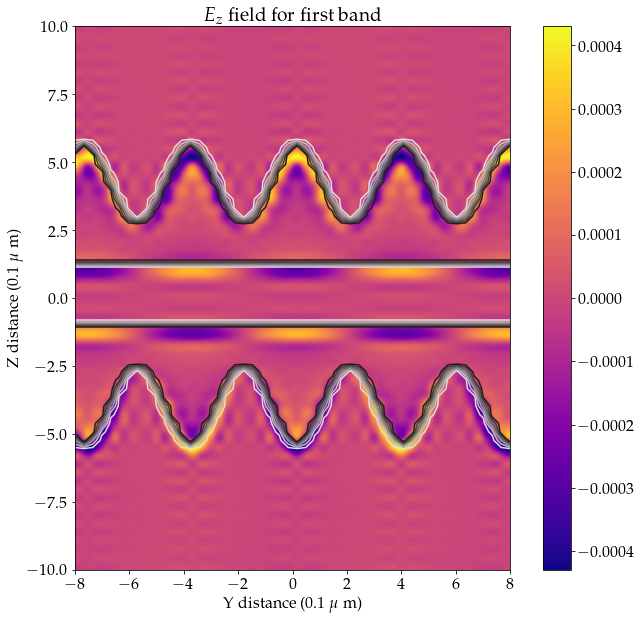

In [18]:
num_band = 0
eps = epsilon
field = fields
ylim = [-10,10]                                                                 #in 0.1 micrometers
zlim = [-8,8]                                                                   #in 0.1 micrometers
a = ax
title = "$E_z$ field  for first band"
fig, ax = plot_field_2D_YZ(eps, field, a, resolution, num_band, ylim,  zlim, title)
ax.set_xlabel('Y distance (0.1 $\\mu$ m)')
ax.set_ylabel('Z distance (0.1 $\\mu$ m)')

Text(0, 0.5, 'Z distance (0.1 $\\mu$ m)')

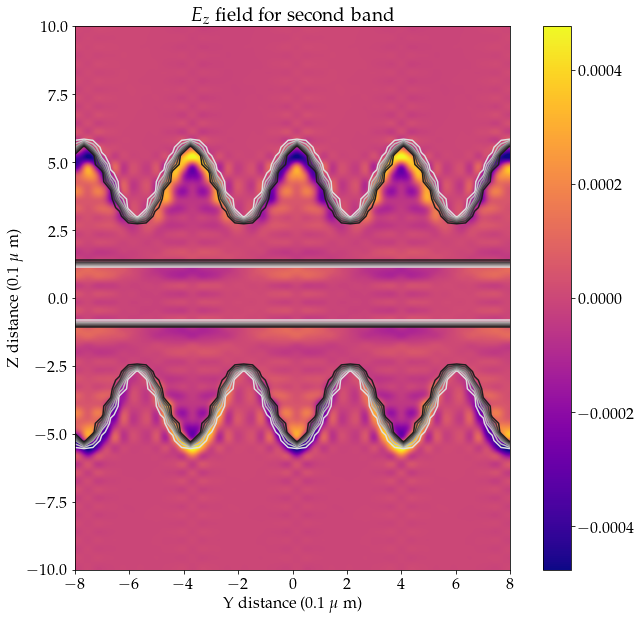

In [19]:
num_band = 1
title = "$E_z$ field  for second band"
fig, ax = plot_field_2D_YZ(eps, field, a, resolution, num_band, ylim,  zlim, title)
ax.set_xlabel('Y distance (0.1 $\\mu$ m)')
ax.set_ylabel('Z distance (0.1 $\\mu$ m)')

Text(0, 0.5, 'Z distance (0.1 $\\mu$ m)')

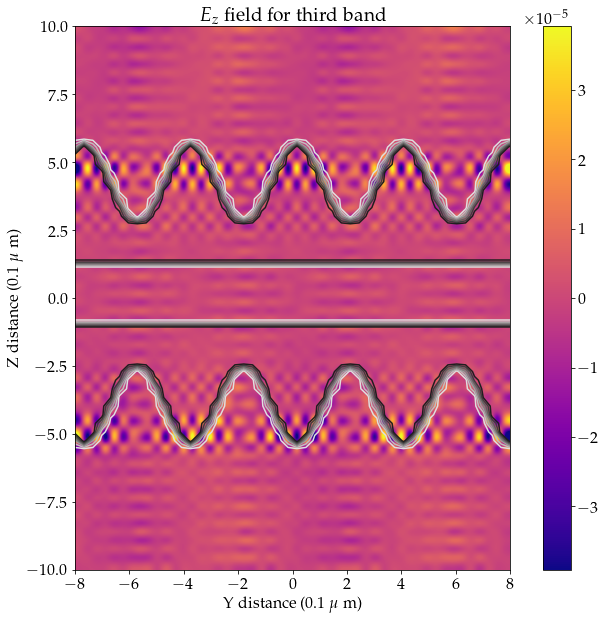

In [20]:
num_band = 2
title = "$E_z$ field  for third band"
fig, ax = plot_field_2D_YZ(eps, field, a, resolution, num_band, ylim,  zlim, title)
ax.set_xlabel('Y distance (0.1 $\\mu$ m)')
ax.set_ylabel('Z distance (0.1 $\\mu$ m)')